# 2-D Exploratory Data Analysis

In this notebook we will pick ONE variable you're interested in understanding from your non-census data and plot it against various census variables in scatterplots or dotplots.

### Standard Python and R imports

In [37]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [39]:
%%R

# My commonly used R imports

require('tidyverse')

## Load the data

In [41]:
%%R
 
# Import data with R
df <- read_csv('4.17_with_statemedian_income_1.csv', show_col_types = FALSE)
df

# A tibble: 17,528 × 57
   STATE     X GEOID.x med_inc_state County       X.x     Y OBJECTID PPIN  NAME 
   <chr> <dbl>   <dbl>         <dbl> <chr>      <dbl> <dbl>    <dbl> <chr> <chr>
 1 AK        1       2         86370 Anchorage… -150.  61.1      279 1604… ST E…
 2 AK        1       2         86370 Fairbanks… -148.  64.9      294 2001… GOLD…
 3 AK        1       2         86370 Bristol B… -150.  61.1      289 A990… LUME…
 4 AK        1       2         86370 Juneau Ci… -134.  58.3      300 24021 JUNE…
 5 AK        1       2         86370 Anchorage… -150.  61.1      288 A970… PACI…
 6 AK        1       2         86370 Kenai Pen… -151.  60.5      303 2001… WING…
 7 AK        1       2         86370 Matanuska… -149.  61.6      305 23935 AMAZ…
 8 AK        1       2         86370 Fairbanks… -148.  64.8      297 A130… SPRU…
 9 AK        1       2         86370 Anchorage… -150.  61.2      286 A950… HOLY…
10 AK        1       2         86370 Anchorage… -150.  61.1      282 A210… GRAC…
# ℹ 

In [42]:
import pandas as pd

df=pd.read_csv('4.17_with_statemedian_income_1.csv')
df

,STATE,X,GEOID.x,med_inc_state,County,X.x,Y,OBJECTID,PPIN,NAME,...,two_or_moreE,two_or_moreM,med_incE,med_incM,hispanicE,hispanicM,poverty_incomeE,poverty_incomeM,poverty_totalE,poverty_totalM
0,AK,1,2,86370,Anchorage Municipality,-149.827491,61.109600,279,1604012,ST ELIZABETH ANN SETON SCHOOL,...,36963,2107,95731,2829,28162,NaN,27415,2611,284386,399
1,AK,1,2,86370,Fairbanks North Star Borough,-147.821831,64.874143,294,2001589,GOLDEN HEART CHRISTIAN SCHOOL,...,11504,1216,81655,4690,8038,NaN,6356,768,92321,221
2,AK,1,2,86370,Bristol Bay Borough,-149.955792,61.147173,289,A9900095,LUMEN CHRISTI HIGH SCHOOL,...,108,38,94167,12682,74,41.0,66,84,837,85
3,AK,1,2,86370,Juneau City and Borough,-134.492231,58.347410,300,24021,JUNEAU SDA CHRISTIAN SCHOOL,...,4828,450,95711,6801,2300,NaN,2176,449,31517,144
4,AK,1,2,86370,Anchorage Municipality,-149.835645,61.133373,288,A9700068,PACIFIC NORTHERN ACADEMY,...,36963,2107,95731,2829,28162,NaN,27415,2611,284386,399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17523,WY,50,56,72495,Natrona County,-104.824531,41.173650,22330,K9500628,MONTESSORI SCHOOL OF CHEYENNE,...,4154,553,69104,3149,7263,NaN,7120,903,78006,179
17524,WY,50,56,72495,Wood County,-104.816681,41.174450,22328,1548521,LAURA E MASON CHRISTIAN ACADEMY,...,7017,642,70537,2274,7862,NaN,16241,1421,125680,262
17525,WY,50,56,72495,Sweetwater County,-109.456931,41.507840,22340,A1703875,GREEN RIVER CHRISTIAN ACADEMY,...,3219,521,79375,4715,6820,NaN,4833,785,41468,108
17526,WY,50,56,72495,Teton County,-110.812671,43.459650,22345,A9301070,JACKSON HOLE CHRISTIAN ACADEMY,...,1063,413,108279,7614,3548,NaN,1606,517,23230,31


In [46]:
df.dtypes

STATE                 object
med_inc_state          int64
County                object
X.x                  float64
Y                    float64
OBJECTID               int64
PPIN                  object
NAME                  object
STREET                object
CITY                  object
ZIP                    int64
STFIP                  int64
CNTY                   int64
NMCNTY                object
LOCALE                 int64
LAT                  float64
LON                  float64
CBSA                  object
NMCBSA                object
CBSATYPE              object
CSA                   object
NMCSA                 object
NECTA                 object
NMNECTA               object
CD                     int64
SLDL                  object
SLDU                  object
SCHOOLYEAR            object
Census_Tract           int64
X.y                    int64
GEOID.y                int64
total_popE             int64
total_popM           float64
whiteE                 int64
whiteM        

In [50]:
df['poverty_rate']=(df['poverty_incomeE']/df['poverty_totalE'])*100
df['total_popE']

0        290674
1         96299
2           854
3         32108
4        290674
          ...  
17523     79506
17524    131564
17525     42079
17526     23346
17527     23346
Name: total_popE, Length: 17528, dtype: int64

In [51]:
df['poverty_totalE']

0        284386
1         92321
2           837
3         31517
4        284386
          ...  
17523     78006
17524    125680
17525     41468
17526     23230
17527     23230
Name: poverty_totalE, Length: 17528, dtype: int64

In [55]:
df_1=df[df['poverty_rate']>= 20]
df_1

,STATE,med_inc_state,County,X.x,Y,OBJECTID,PPIN,NAME,STREET,CITY,...,two_or_moreM,med_incE,med_incM,hispanicE,hispanicM,poverty_incomeE,poverty_incomeM,poverty_totalE,poverty_totalM,poverty_rate
31,AL,59609,Jackson County,-85.588134,34.876612,74,3384,FLORAL CREST SCHOOL,1228 COUNTY ROAD 89,BRYANT,...,373,44847,2947,2490,NaN,11449,876,49871,56,22.957230
49,AL,59609,Baldwin County,-87.600521,30.411200,6,634,ST BENEDICT CATHOLIC SCHOOL,12786 ILLINOIS ST,ELBERTA,...,310,54699,3336,1161,NaN,8864,1128,39122,188,22.657328
50,AL,59609,Baldwin County,-87.903695,30.600475,7,645,CHRIST THE KING CATHOLIC SCHOOL,1503 MAIN ST,DAPHNE,...,310,54699,3336,1161,NaN,8864,1128,39122,188,22.657328
67,AL,59609,Hale County,-87.584021,32.699108,66,2358,SOUTHERN ACADEMY,407 COLLEGE ST,GREENSBORO,...,311,35851,7915,25,25.0,3613,749,14448,70,25.006921
79,AL,59609,Escambia County,-86.108894,32.615773,58,A1500002,ADULLAM HOUSE CHRISTIAN ACADEMY,7469 GEORGIA RD,WETUMPKA,...,584,41153,2502,940,NaN,7449,853,34154,129,21.810037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17490,WV,55217,Cabell County,-79.171670,38.994460,21538,A1303700,BMF CHRISTIAN,3671 JOHNSON RUN RD,PETERSBURG,...,504,48944,3441,1407,NaN,18063,1366,89806,264,20.113355
17494,WV,55217,Summers County,-81.052451,39.304950,21601,A0702439,THE HIGHLAND SCHOOL,98 SYCAMORE SPRINGS LN,ELLENBORO,...,65,42991,6897,280,126.0,2351,439,11097,32,21.185906
17501,WV,55217,Summers County,-80.963926,37.533593,21602,2067813,PIPESTEM CHRISTIAN ACADEMY,9549 S STATE ROAD 20,PIPESTEM,...,65,42991,6897,280,126.0,2351,439,11097,32,21.185906
17503,WV,55217,Raleigh County,-81.260771,37.708016,21592,A0303342,SOPHIA CHRISTIAN ACADEMY,124 WICKLINE AVE,SOPHIA,...,502,47975,4663,1211,NaN,15613,1945,70886,228,22.025506


## Which states have the highest private schools where the poverty rate is equal to or above 20 percent

In [57]:
df_1['STATE'].value_counts()

STATE
WA    178
FL    157
OH    135
PA    106
NY     96
MI     86
LA     76
TX     71
GA     69
MO     68
MS     43
NC     41
TN     39
CA     37
IN     34
AL     24
WV     24
SC     22
NM     21
VA     20
KY     15
AZ     11
OR      8
MN      6
IA      6
MT      6
OK      6
IL      5
SD      4
KS      2
NE      2
WI      2
CO      1
UT      1
AR      1
Name: count, dtype: int64

In [61]:
df['low_income']=df['med_inc_state']*0.80
df['low_income']

0        69096.0
1        69096.0
2        69096.0
3        69096.0
4        69096.0
          ...   
17523    57996.0
17524    57996.0
17525    57996.0
17526    57996.0
17527    57996.0
Name: low_income, Length: 17528, dtype: float64

In [68]:
df_2 = df[df['med_incE'] <= df['low_income']].reset_index()
df_2


,index,STATE,med_inc_state,County,X.x,Y,OBJECTID,PPIN,NAME,STREET,...,med_incE,med_incM,hispanicE,hispanicM,poverty_incomeE,poverty_incomeM,poverty_totalE,poverty_totalM,poverty_rate,low_income
0,31,AL,59609,Jackson County,-85.588134,34.876612,74,3384,FLORAL CREST SCHOOL,1228 COUNTY ROAD 89,...,44847,2947,2490,NaN,11449,876,49871,56,22.957230,47687.2
1,33,AL,59609,Dallas County,-87.048091,32.424810,51,A1592002,ELLWOOD CHRISTIAN ACADEMY,1 BELL RD,...,40085,9399,82,60.0,723,256,6071,19,11.909076,47687.2
2,67,AL,59609,Hale County,-87.584021,32.699108,66,2358,SOUTHERN ACADEMY,407 COLLEGE ST,...,35851,7915,25,25.0,3613,749,14448,70,25.006921,47687.2
3,79,AL,59609,Escambia County,-86.108894,32.615773,58,A1500002,ADULLAM HOUSE CHRISTIAN ACADEMY,7469 GEORGIA RD,...,41153,2502,940,NaN,7449,853,34154,129,21.810037,47687.2
4,107,AL,59609,Dallas County,-87.061921,32.404780,50,2198,MEADOWVIEW CHRISTIAN SCHOOL,1512 OLD ORRVILLE RD,...,40085,9399,82,60.0,723,256,6071,19,11.909076,47687.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3690,17425,WI,72458,Green County,-89.634761,42.598210,21810,1510597,ST VICTOR SCHOOL,1416 20TH AVE,...,38595,5791,199,154.0,2356,429,11036,35,21.348315,57966.4
3691,17473,WV,55217,Mingo County,-79.936401,39.611130,21572,2067653,MORGANTOWN CHRISTIAN ACADEMY,809 GREENBAG RD,...,38305,4273,64,69.0,6679,912,23338,71,28.618562,44173.6
3692,17494,WV,55217,Summers County,-81.052451,39.304950,21601,A0702439,THE HIGHLAND SCHOOL,98 SYCAMORE SPRINGS LN,...,42991,6897,280,126.0,2351,439,11097,32,21.185906,44173.6
3693,17501,WV,55217,Summers County,-80.963926,37.533593,21602,2067813,PIPESTEM CHRISTIAN ACADEMY,9549 S STATE ROAD 20,...,42991,6897,280,126.0,2351,439,11097,32,21.185906,44173.6


In [67]:
df_2['STATE'].value_counts()

STATE
CA    330
PA    313
WA    295
OH    283
TX    260
NY    206
FL    200
VA    176
NJ    165
MA    161
GA    124
MN    115
TN    114
IN    103
MI    102
MD    100
IL     82
MO     72
CO     66
OR     62
NC     53
NH     34
SC     31
WI     26
LA     23
IA     20
UT     19
MS     17
AL     16
AZ     16
HI     14
KY     13
VT     11
KS     10
MT      9
OK      8
NE      7
NM      6
ID      6
SD      6
RI      6
ND      4
ME      3
WV      3
AR      2
NV      1
CT      1
WY      1
Name: count, dtype: int64

In [69]:
df_2[df_2['STATE']=='CA']

,index,STATE,med_inc_state,County,X.x,Y,OBJECTID,PPIN,NAME,STREET,...,med_incE,med_incM,hispanicE,hispanicM,poverty_incomeE,poverty_incomeM,poverty_totalE,poverty_totalM,poverty_rate,low_income
34,557,CA,91905,Adams County,-121.575029,39.120066,3176,A2100492,NEW LIFE CHRISTIAN SCHOOL,5736 ARBOGA RD,...,61731,3337,1673,NaN,4040,659,35257,60,11.458717,73524.0
35,645,CA,91905,Merced County,-120.476906,37.327293,1824,A0101307,STONE RIDGE CHRISTIAN SCHOOL,500 BUENA VISTA DR,...,64772,2142,174732,NaN,51272,3325,276803,366,18.522921,73524.0
36,678,CA,91905,Kern County,-118.941052,35.396969,1013,A1500423,NIGRITIAN ACADEMY,2600 LA COSTA CT,...,63883,1325,501705,NaN,170013,6132,881217,1062,19.292978,73524.0
37,679,CA,91905,Kern County,-118.965939,35.390055,1003,89952,HERITAGE CHRISTIAN SCHOOLS,2401 BERNARD ST,...,63883,1325,501705,NaN,170013,6132,881217,1062,19.292978,73524.0
38,711,CA,91905,Humboldt County,-124.164273,40.789227,982,2114195,REDWOOD CHRISTIAN SCHOOL,2039 E ST,...,57881,2131,17129,NaN,26394,1599,133139,299,19.824394,73524.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2528,CA,91905,Orange County,-117.867001,33.790940,1981,A1900562,MONTESSORI FAR HORIZONS,264 N MAIN ST,...,72629,1122,469883,NaN,187454,7020,1387668,980,13.508563,73524.0
360,2529,CA,91905,Orange County,-117.668471,33.680290,1971,A1770327,GUIDEPOST MONTESSORI FOOTHILL RANCH,26462 TOWNE CENTRE DR,...,72629,1122,469883,NaN,187454,7020,1387668,980,13.508563,73524.0
361,2532,CA,91905,Orange County,-117.684701,33.621688,2107,K9500045,APPLETREE MONTESSORI,25542 JERONIMO RD,...,72629,1122,469883,NaN,187454,7020,1387668,980,13.508563,73524.0
362,2534,CA,91905,Orange County,-117.877856,33.679982,1969,A1770312,FRONTIERS ACADEMY,102 BAKER ST,...,72629,1122,469883,NaN,187454,7020,1387668,980,13.508563,73524.0


In [65]:
df_2.to_csv('practice.csv')

In [40]:
%%R
 
# Import data with R
df <- read_csv('total_7_29_data.csv', show_col_types = FALSE)
df

# A tibble: 17,580 × 47
   County      X     Y OBJECTID PPIN  NAME  STREET CITY  STATE   ZIP STFIP  CNTY
   <chr>   <dbl> <dbl>    <dbl> <chr> <chr> <chr>  <chr> <chr> <dbl> <dbl> <dbl>
 1 Abbev…  -81.7  33.6    18074 1264… MEAD… 129 P… AIKEN SC    29801    45 45003
 2 Abbev…  -82.4  34.2    18071 1265… COLD… 168 C… ABBE… SC    29620    45 45001
 3 Acadi…  -92.4  30.2     8801 2028… NORT… 809 E… CROW… LA    70526    22 22001
 4 Acadi…  -92.5  30.3     8799 5398… ST F… 490 S… IOTA  LA    70543    22 22001
 5 Acadi…  -92.2  30.4     8797 5397… OUR … 218 N… CHUR… LA    70525    22 22001
 6 Acadi…  -92.4  30.2     8798 5397… ST M… 805 E… CROW… LA    70526    22 22001
 7 Acadi…  -92.3  30.2     8800 5401… RAYN… 407 S… RAYNE LA    70578    22 22001
 8 Acadi…  -84.7  38.0     8796 A950… VERS… 480 P… VERS… KY    40383    21 21239
 9 Ada C… -116.   43.6     6512 A075… LEAR… 2908 … BOISE ID    83703    16 16001
10 Ada C… -116.   43.7     6521 A210… INNO… 342 E… EAGLE ID    83616    16 16001
# ℹ 

In [5]:
# Import data in python
df = pd.read_csv('total_7_29_data.csv')
df

,County,X,Y,OBJECTID,PPIN,NAME,STREET,CITY,STATE,ZIP,...,med_inc_estimate,total_pop_moe,white_moe,black_moe,native_american_moe,asian_moe,pacific_islander_moe,other_race_moe,two_or_more_moe,med_inc_moe
0,Abbeville County,-81.724593,33.561372,18074,1264754,MEAD HALL EPISCOPAL SCHOOL,129 PENDLETON ST SW,AIKEN,SC,29801,...,49759,NaN,163,167,27,90,25,109,204,4901
1,Abbeville County,-82.401851,34.234799,18071,1265102,COLD SPRINGS MENNONITE SCHOOL,168 COLD SPRINGS CHURCH RD,ABBEVILLE,SC,29620,...,49759,NaN,163,167,27,90,25,109,204,4901
2,Acadia Parish,-92.369765,30.225854,8801,2028727,NORTHSIDE CHRISTIAN SCHOOL,809 E NORTHERN AVE,CROWLEY,LA,70526,...,44977,NaN,374,508,296,62,33,156,586,2841
3,Acadia Parish,-92.492455,30.318103,8799,539857,ST FRANCIS SCHOOL,490 SAINT JOSEPH AVE,IOTA,LA,70543,...,44977,NaN,374,508,296,62,33,156,586,2841
4,Acadia Parish,-92.215586,30.407770,8797,539744,OUR MOTHER OF PEACE ELEMENTARY,218 N ROGERS ST,CHURCH POINT,LA,70525,...,44977,NaN,374,508,296,62,33,156,586,2841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17575,Yuma County,-112.024890,34.741368,598,A2100207,RISE RESOURCE CENTER,301 N WILLARD ST,COTTONWOOD,AZ,86326,...,60118,NaN,374,34,73,39,21,140,391,7842
17576,Yuma County,-112.470961,34.593290,600,BB200014,PRESCOTT ADVENTIST CHRISTIAN SCHOOL,2980 WILLOW CREEK RD,PRESCOTT,AZ,86301,...,60118,NaN,374,34,73,39,21,140,391,7842
17577,Yuma County,-114.644921,32.677850,605,A0300076,YUMA CATHOLIC HIGH SCHOOL,2100 W 28TH ST,YUMA,AZ,85364,...,60118,NaN,374,34,73,39,21,140,391,7842
17578,Yuma County,-114.626541,32.697090,606,A1700088,YUMA ADVENTIST CHRISTIAN SCHOOL,1681 S 6TH AVE,YUMA,AZ,85364,...,60118,NaN,374,34,73,39,21,140,391,7842


## I will now filter for private schools only in Louisiana.  This is because my source is a journalist reporting on private schools in Lousiana and Mississipi. I will show this specific data to him. 

In [6]:
df_lou=df[df['STATE']=='LA']
df_lou

,County,X,Y,OBJECTID,PPIN,NAME,STREET,CITY,STATE,ZIP,...,med_inc_estimate,total_pop_moe,white_moe,black_moe,native_american_moe,asian_moe,pacific_islander_moe,other_race_moe,two_or_more_moe,med_inc_moe
2,Acadia Parish,-92.369765,30.225854,8801,2028727,NORTHSIDE CHRISTIAN SCHOOL,809 E NORTHERN AVE,CROWLEY,LA,70526,...,44977,NaN,374,508,296,62,33,156,586,2841
3,Acadia Parish,-92.492455,30.318103,8799,539857,ST FRANCIS SCHOOL,490 SAINT JOSEPH AVE,IOTA,LA,70543,...,44977,NaN,374,508,296,62,33,156,586,2841
4,Acadia Parish,-92.215586,30.407770,8797,539744,OUR MOTHER OF PEACE ELEMENTARY,218 N ROGERS ST,CHURCH POINT,LA,70525,...,44977,NaN,374,508,296,62,33,156,586,2841
5,Acadia Parish,-92.370620,30.226237,8798,539777,ST MICHAEL ELEMENTARY SCHOOL,805 E NORTHERN AVE,CROWLEY,LA,70526,...,44977,NaN,374,508,296,62,33,156,586,2841
6,Acadia Parish,-92.267062,30.232649,8800,540115,RAYNE CATHOLIC ELEMENTARY,407 S POLK ST,RAYNE,LA,70578,...,44977,NaN,374,508,296,62,33,156,586,2841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16528,Vermilion Parish,-92.105304,29.978367,9072,A0103835,HARVEST TIME CHRISTIAN ACADEMY,103 ROBERT WELLS RD,ABBEVILLE,LA,70510,...,56194,NaN,514,404,80,112,150,176,564,3429
16868,Washington Parish,-90.157033,30.838519,9075,542462,BOWLING GREEN SCHOOL,700 VARNADO ST,FRANKLINTON,LA,70438,...,41803,NaN,418,268,45,82,30,331,520,3193
16869,Washington Parish,-92.140354,29.981496,9073,X0539697,VERMILION CATHOLIC HIGH SCHOOL,425 PARK AVE,ABBEVILLE,LA,70510,...,41803,NaN,418,268,45,82,30,331,520,3193
17095,Webster Parish,-89.897218,30.738974,9076,2160335,BENS FORD CHRISTIAN SCHOOL,59253 MOUNT PLEASANT RD # 2,BOGALUSA,LA,70427,...,34263,NaN,202,169,62,62,10,35,254,1859


## Here, I am counting the number of private schools per county. 

In [7]:
df_counts = df_lou.groupby('County').size().reset_index(name='Count')

other_columns = df_lou.drop(columns=['NAME']).groupby('County').first().reset_index()

df_count = pd.merge(df_counts, other_columns, on='County')

df_count

,County,Count,X,Y,OBJECTID,PPIN,STREET,CITY,STATE,ZIP,...,med_inc_estimate,total_pop_moe,white_moe,black_moe,native_american_moe,asian_moe,pacific_islander_moe,other_race_moe,two_or_more_moe,med_inc_moe
0,Acadia Parish,5,-92.369765,30.225854,8801,2028727,809 E NORTHERN AVE,CROWLEY,LA,70526,...,44977,NaN,374,508,296,62,33,156,586,2841
1,Allen Parish,1,-92.714230,30.518285,8803,A1101131,152 INDIAN CHURCH RD,ELTON,LA,70532,...,52755,NaN,325,193,111,28,26,111,349,6411
2,Androscoggin County,1,-93.294550,32.641564,9077,541061,1674 COUNTRY CLUB CIR,MINDEN,LA,71055,...,64500,NaN,357,414,88,240,27,195,565,2165
3,Ascension Parish,4,-92.367620,30.221626,8802,A0701071,910 N EASTERN AVE,CROWLEY,LA,70526,...,93800,NaN,514,843,138,294,123,596,1005,3514
4,Assumption Parish,1,-90.904433,30.208293,8807,A2101871,2807 S HODGESON AVE,GONZALES,LA,70737,...,47023,NaN,169,194,41,114,26,27,220,3781
5,Avoyelles Parish,3,-91.983495,30.965052,8812,Y0538795,3406 HWY 107 S,PLAUCHEVILLE,LA,71362,...,38696,NaN,268,581,131,39,17,167,684,5175
6,Beauregard Parish,1,-92.054809,30.987003,8811,538955,850 FRONT ST,COTTONPORT,LA,71327,...,68525,NaN,299,222,38,36,32,212,340,6225
7,Caddo Parish,11,-93.750551,32.497370,8814,538718,947 JORDAN ST,SHREVEPORT,LA,71101,...,47572,NaN,662,866,215,252,33,486,1159,2032
8,Calcasieu Parish,6,-93.204431,30.208040,8832,1922942,2510 ENTERPRISE BLVD,LAKE CHARLES,LA,70601,...,64370,NaN,944,920,228,256,70,817,1154,3249
9,Caldwell Parish,1,-92.183392,32.014595,8836,A0901597,1468 HWY 547,CLARKS,LA,71415,...,45707,NaN,84,125,20,10,20,79,106,7075


In [27]:
df_count.to_csv('louis.csv', index=False) 

## Experimenting here. How many schools exist in counties where the median income is <= $50,0000

In [32]:
less_than_df=df[df['med_inc_estimate'] <= 45000].reset_index()
less_than_df

,index,County,X,Y,OBJECTID,PPIN,NAME,STREET,CITY,STATE,...,med_inc_estimate,total_pop_moe,white_moe,black_moe,native_american_moe,asian_moe,pacific_islander_moe,other_race_moe,two_or_more_moe,med_inc_moe
0,2,Acadia Parish,-92.369765,30.225854,8801,2028727,NORTHSIDE CHRISTIAN SCHOOL,809 E NORTHERN AVE,CROWLEY,LA,...,44977,NaN,374,508,296,62,33,156,586,2841
1,3,Acadia Parish,-92.492455,30.318103,8799,539857,ST FRANCIS SCHOOL,490 SAINT JOSEPH AVE,IOTA,LA,...,44977,NaN,374,508,296,62,33,156,586,2841
2,4,Acadia Parish,-92.215586,30.407770,8797,539744,OUR MOTHER OF PEACE ELEMENTARY,218 N ROGERS ST,CHURCH POINT,LA,...,44977,NaN,374,508,296,62,33,156,586,2841
3,5,Acadia Parish,-92.370620,30.226237,8798,539777,ST MICHAEL ELEMENTARY SCHOOL,805 E NORTHERN AVE,CROWLEY,LA,...,44977,NaN,374,508,296,62,33,156,586,2841
4,6,Acadia Parish,-92.267062,30.232649,8800,540115,RAYNE CATHOLIC ELEMENTARY,407 S POLK ST,RAYNE,LA,...,44977,NaN,374,508,296,62,33,156,586,2841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,17461,Wright County,-93.781171,45.296426,11177,A1502130,HOLY SPIRIT ACADEMY,1001 E 7TH ST STE 1,MONTICELLO,MN,...,43573,NaN,220,27,35,58,23,21,200,2950
556,17462,Wright County,-96.274837,44.713638,11179,701855,SCHOOL OF ST PETER,410 RING AVE N,CANBY,MN,...,43573,NaN,220,27,35,58,23,21,200,2950
557,17463,Wright County,-93.788501,45.038240,11173,701108,ST MAXIMILIAN KOLBE,235 SECOND ST S,DELANO,MN,...,43573,NaN,220,27,35,58,23,21,200,2950
558,17464,Wright County,-92.551146,37.315460,11795,A2102253,WHITE DOVE CHRISTIAN ACADEMY,7115 HWY 5,GROVESPRING,MO,...,43573,NaN,220,27,35,58,23,21,200,2950


## Here are the results per state! Ohio and Texas lead. 

In [33]:
less_than_df['STATE'].value_counts()

STATE
TX    147
MI     59
OH     57
MO     46
FL     36
MS     24
LA     22
SC     20
NC     20
GA     14
AL     14
TN     14
CA     12
IN     11
KY      8
OR      8
MN      6
NM      6
IA      5
WV      5
IL      3
SD      3
VA      3
OK      3
AZ      3
WI      2
MT      2
PA      2
NY      2
AR      1
ID      1
NE      1
Name: count, dtype: int64

## I have read a lot about Southern private schools. Let's look at the ones in Ohio. 

In [14]:
ohio_df=less_than_df[less_than_df['STATE']=='OH']
ohio_df

,index,County,X,Y,OBJECTID,PPIN,NAME,STREET,CITY,STATE,...,med_inc_estimate,total_pop_moe,white_moe,black_moe,native_american_moe,asian_moe,pacific_islander_moe,other_race_moe,two_or_more_moe,med_inc_moe
17,746,Athens County,-80.938224,41.773932,15100,A2103002,SPIRE ACADEMY,5201 SPIRE CIR,GENEVA,OH,...,48750,NaN,194,163,48,222,27,147,278,3695
125,2112,Butler County,-84.383161,39.396460,15119,A0701816,MOTHER TERESA CATHOLIC ELEMENTARY,7197 MOTHER TERESA LN,LIBERTY TOWNSHIP,OH,...,47589,NaN,145,60,14,57,19,107,119,5577
126,2113,Butler County,-84.460021,39.348480,15120,A1101843,"KINDER GARDEN SCHOOL, WEST CHESTER",8374 PRINCETON GLENDALE RD STE 5,WEST CHESTER,OH,...,47589,NaN,145,60,14,57,19,107,119,5577
128,2115,Butler County,-84.385386,39.378285,15125,A2102999,ROYAL REDEEMER LUTHERAN PRESCHOOL,7127 DUTCHLAND PKWY,LIBERTY TWP,OH,...,47589,NaN,145,60,14,57,19,107,119,5577
129,2116,Butler County,-84.502951,39.361130,15126,A9503228,FARMVIEW MONTESSORI GARDEN,3501 TYLERSVILLE RD,HAMILTON,OH,...,47589,NaN,145,60,14,57,19,107,119,5577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,17056,Wayne County,-81.697281,40.715510,16007,A1302428,NORTH FORK,6869 S MT. EATON RD,DALTON,OH,...,41583,NaN,67,77,127,15,19,174,217,4426
1280,17058,Wayne County,-81.547221,39.466870,15969,1060477,ST JOHN CENTRAL GRADE SCHOOL,17654 STATE ROUTE 676,MARIETTA,OH,...,41583,NaN,67,77,127,15,19,174,217,4426
1281,17059,Wayne County,-81.934271,40.804100,15972,1058978,ST MARY OF IMMACULATE CONCEPTION SCHOOL,515 BEALL AVE,WOOSTER,OH,...,41583,NaN,67,77,127,15,19,174,217,4426
1283,17061,Wayne County,-81.746671,40.709786,15977,A1302250,BEECH GROVE,7373 KIDRON RD,APPLE CREEK,OH,...,41583,NaN,67,77,127,15,19,174,217,4426


In [15]:
ohio_df.dtypes

index                          int64
County                        object
X                            float64
Y                            float64
OBJECTID                       int64
PPIN                          object
NAME                          object
STREET                        object
CITY                          object
STATE                         object
ZIP                            int64
STFIP                          int64
CNTY                           int64
NMCNTY                        object
LOCALE                         int64
LAT                          float64
LON                          float64
CBSA                          object
NMCBSA                        object
CBSATYPE                      object
CSA                           object
NMCSA                         object
NECTA                         object
NMNECTA                       object
CD                             int64
SLDL                          object
SLDU                          object
S

In [34]:
ohio_df['white_percentage'] = ohio_df['white_estimate'] / ohio_df['total_pop_estimate']
ohio_df

,index,County,X,Y,OBJECTID,PPIN,NAME,STREET,CITY,STATE,...,white_moe,black_moe,native_american_moe,asian_moe,pacific_islander_moe,other_race_moe,two_or_more_moe,med_inc_moe,black_percentage,white_percentage
17,746,Athens County,-80.938224,41.773932,15100,A2103002,SPIRE ACADEMY,5201 SPIRE CIR,GENEVA,OH,...,194,163,48,222,27,147,278,3695,0.025410,0.908773
125,2112,Butler County,-84.383161,39.396460,15119,A0701816,MOTHER TERESA CATHOLIC ELEMENTARY,7197 MOTHER TERESA LN,LIBERTY TOWNSHIP,OH,...,145,60,14,57,19,107,119,5577,0.005176,0.959887
126,2113,Butler County,-84.460021,39.348480,15120,A1101843,"KINDER GARDEN SCHOOL, WEST CHESTER",8374 PRINCETON GLENDALE RD STE 5,WEST CHESTER,OH,...,145,60,14,57,19,107,119,5577,0.005176,0.959887
128,2115,Butler County,-84.385386,39.378285,15125,A2102999,ROYAL REDEEMER LUTHERAN PRESCHOOL,7127 DUTCHLAND PKWY,LIBERTY TWP,OH,...,145,60,14,57,19,107,119,5577,0.005176,0.959887
129,2116,Butler County,-84.502951,39.361130,15126,A9503228,FARMVIEW MONTESSORI GARDEN,3501 TYLERSVILLE RD,HAMILTON,OH,...,145,60,14,57,19,107,119,5577,0.005176,0.959887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,17056,Wayne County,-81.697281,40.715510,16007,A1302428,NORTH FORK,6869 S MT. EATON RD,DALTON,OH,...,67,77,127,15,19,174,217,4426,0.004932,0.929523
1280,17058,Wayne County,-81.547221,39.466870,15969,1060477,ST JOHN CENTRAL GRADE SCHOOL,17654 STATE ROUTE 676,MARIETTA,OH,...,67,77,127,15,19,174,217,4426,0.004932,0.929523
1281,17059,Wayne County,-81.934271,40.804100,15972,1058978,ST MARY OF IMMACULATE CONCEPTION SCHOOL,515 BEALL AVE,WOOSTER,OH,...,67,77,127,15,19,174,217,4426,0.004932,0.929523
1283,17061,Wayne County,-81.746671,40.709786,15977,A1302250,BEECH GROVE,7373 KIDRON RD,APPLE CREEK,OH,...,67,77,127,15,19,174,217,4426,0.004932,0.929523


## Here I am checking to see the racial demographics per county in Ohio. The private schools are located in counties where overwhelming majoirty is white and very small population is Black. 

In [36]:
ohio_df['white_percentage'].min

<bound method Series.min of 17      0.908773
125     0.959887
126     0.959887
128     0.959887
129     0.959887
          ...   
1278    0.929523
1280    0.929523
1281    0.929523
1283    0.929523
1284    0.929523
Name: white_percentage, Length: 254, dtype: float64>

In [18]:
ohio_df.to_csv('ohio_schools.csv')

## Curious where these low-income schools are located. 

In [25]:
%%R
 
# Import data with R
df <- read_csv('ohio_schools.csv', show_col_types = FALSE)
df

New names:
• `` -> `...1`
# A tibble: 254 × 50
    ...1 index County      X     Y OBJECTID PPIN  NAME  STREET CITY  STATE   ZIP
   <dbl> <dbl> <chr>   <dbl> <dbl>    <dbl> <chr> <chr> <chr>  <chr> <chr> <dbl>
 1    17   746 Athens… -80.9  41.8    15100 A210… SPIR… 5201 … GENE… OH    44041
 2   125  2112 Butler… -84.4  39.4    15119 A070… MOTH… 7197 … LIBE… OH    45044
 3   126  2113 Butler… -84.5  39.3    15120 A110… KIND… 8374 … WEST… OH    45069
 4   128  2115 Butler… -84.4  39.4    15125 A210… ROYA… 7127 … LIBE… OH    45044
 5   129  2116 Butler… -84.5  39.4    15126 A950… FARM… 3501 … HAMI… OH    45011
 6   130  2117 Butler… -84.6  39.4    15118 A030… ST P… 451 R… HAMI… OH    45013
 7   132  2119 Butler… -84.8  39.5    15115 2118… MCGU… 5128 … OXFO… OH    45056
 8   133  2120 Butler… -84.4  39.5    15116 2121… ST J… 3806 … MIDD… OH    45042
 9   138  2125 Butler… -84.4  39.3    15117 A030… INTE… 8094 … WEST… OH    45069
10   142  2129 Butler… -84.6  39.4    15114 1895… STEP… 571 H…

In [21]:
%%R 

library(tigris)

# remove water from the shapefiles
# https://walker-data.com/tidycensus/articles/spatial-data.html
nyc_census_data <- nyc_census_data %>% 
    erase_water()

To enable caching of data, set `options(tigris_use_cache = TRUE)`
in your R script or .Rprofile.


In [26]:
%%R

library(tidycensus)
library(tidyverse)
options(tigris_use_cache = TRUE)

df<- get_acs(
  state = "OH",
  geography = "county",
  variables = "B19013_001",
  geometry = TRUE,
  year = 2020
)

head(df)

Simple feature collection with 6 features and 5 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -84.82016 ymin: 39.02208 xmax: -80.51916 ymax: 41.97716
Geodetic CRS:  NAD83
  GEOID                    NAME   variable estimate  moe
1 39043       Erie County, Ohio B19013_001    58408 3150
2 39093     Lorain County, Ohio B19013_001    58798 1274
3 39061   Hamilton County, Ohio B19013_001    59190 1190
4 39007  Ashtabula County, Ohio B19013_001    47925 2297
5 39167 Washington County, Ohio B19013_001    51808 1903
6 39123     Ottawa County, Ohio B19013_001    59306 4060
                        geometry
1 MULTIPOLYGON (((-82.73447 4...
2 MULTIPOLYGON (((-82.34807 4...
3 MULTIPOLYGON (((-84.82016 3...
4 MULTIPOLYGON (((-81.00476 4...
5 MULTIPOLYGON (((-81.85293 3...
6 MULTIPOLYGON (((-82.74167 4...


Getting data from the 2016-2020 5-year ACS
Using FIPS code '39' for state 'OH'


In [17]:
ohio_df['black_percentage'].max

<bound method Series.max of 17      0.025410
125     0.005176
126     0.005176
128     0.005176
129     0.005176
          ...   
1278    0.004932
1280    0.004932
1281    0.004932
1283    0.004932
1284    0.004932
Name: black_percentage, Length: 254, dtype: float64>

## Finding the white percentage. This will be useful to the future to see if the number of whites in a county have any relation to the number of private schools in the county. 

In [53]:
#For my first scatterplot, I want to look at the total amount of white people per county. 
df['white_percentage'] = df['white_estimate'] / df['total_pop_estimate']
df

,County,X,Y,OBJECTID,PPIN,NAME,STREET,CITY,STATE,ZIP,...,total_pop_moe,white_moe,black_moe,native_american_moe,asian_moe,pacific_islander_moe,other_race_moe,two_or_more_moe,med_inc_moe,white_percentage
0,Abbeville County,-81.724593,33.561372,18074,1264754,MEAD HALL EPISCOPAL SCHOOL,129 PENDLETON ST SW,AIKEN,SC,29801,...,NaN,163,167,27,90,25,109,204,4901,0.694148
1,Abbeville County,-82.401851,34.234799,18071,1265102,COLD SPRINGS MENNONITE SCHOOL,168 COLD SPRINGS CHURCH RD,ABBEVILLE,SC,29620,...,NaN,163,167,27,90,25,109,204,4901,0.694148
2,Acadia Parish,-92.369765,30.225854,8801,2028727,NORTHSIDE CHRISTIAN SCHOOL,809 E NORTHERN AVE,CROWLEY,LA,70526,...,NaN,374,508,296,62,33,156,586,2841,0.784236
3,Acadia Parish,-92.492455,30.318103,8799,539857,ST FRANCIS SCHOOL,490 SAINT JOSEPH AVE,IOTA,LA,70543,...,NaN,374,508,296,62,33,156,586,2841,0.784236
4,Acadia Parish,-92.215586,30.407770,8797,539744,OUR MOTHER OF PEACE ELEMENTARY,218 N ROGERS ST,CHURCH POINT,LA,70525,...,NaN,374,508,296,62,33,156,586,2841,0.784236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17575,Yuma County,-112.024890,34.741368,598,A2100207,RISE RESOURCE CENTER,301 N WILLARD ST,COTTONWOOD,AZ,86326,...,NaN,374,34,73,39,21,140,391,7842,0.838499
17576,Yuma County,-112.470961,34.593290,600,BB200014,PRESCOTT ADVENTIST CHRISTIAN SCHOOL,2980 WILLOW CREEK RD,PRESCOTT,AZ,86301,...,NaN,374,34,73,39,21,140,391,7842,0.838499
17577,Yuma County,-114.644921,32.677850,605,A0300076,YUMA CATHOLIC HIGH SCHOOL,2100 W 28TH ST,YUMA,AZ,85364,...,NaN,374,34,73,39,21,140,391,7842,0.838499
17578,Yuma County,-114.626541,32.697090,606,A1700088,YUMA ADVENTIST CHRISTIAN SCHOOL,1681 S 6TH AVE,YUMA,AZ,85364,...,NaN,374,34,73,39,21,140,391,7842,0.838499


In [108]:
# Filtering just for Ohio
df_oh = df[df['STATE'] == 'OH']

# Count the number of times each county is represented
county_counts = df_oh['County'].value_counts().reset_index()
county_counts.columns = ['County', 'Count']

# Get the total Black population per county
county_pop = df_oh.groupby('County')['white_percentage'].sum().reset_index()

# Merge the two DataFrames
white_pop = county_counts.merge(county_pop, on='County')

white_pop

,County,Count,white_percentage
0,Holmes County,92,79.219212
1,Cuyahoga County,73,43.670396
2,Franklin County,69,62.452874
3,Hamilton County,69,40.836422
4,Wayne County,56,52.053290
...,...,...,...
67,Morrow County,1,0.699506
68,Jackson County,1,0.741218
69,Adams County,1,0.945097
70,Lawrence County,1,0.906542


# Exploratory data analysis



## 2-D visualizations (aka scatter plots)

It seems simple. It's not simple. mainly because...

**CORRELATION =/= CAUSATION**

Comparing variables to one another can be TRICKY!

Let's make some 2-D visualizations (aka scatter plots).

Be VERY careful how you phrase the headlines. Take time to think through what you want to say.




In [15]:
texas_df

,County,Count,total_pop_estimate,white_estimate,med_inc_estimate,white_percentage
0,Anderson County,1,204592,159828,62347,0.781204
1,Angelina County,3,86608,61095,57055,0.705420
2,Aransas County,2,24048,19514,58168,0.811460
3,Austin County,1,30406,22162,73556,0.728869
4,Bandera County,1,21182,16997,70965,0.802427
...,...,...,...,...,...,...
98,Washington County,2,4817,4426,59087,0.918829
99,Webb County,7,267282,143491,59984,0.536852
100,Wharton County,2,41614,29464,59712,0.708031
101,Wichita County,1,2131,1695,69551,0.795401


In [16]:
texas_df.to_csv('texas_1.csv')

In [17]:
%%R
 

texas_df <- read_csv('texas_1.csv', show_col_types = FALSE)
texas_df

New names:
• `` -> `...1`
# A tibble: 103 × 7
    ...1 County         Count total_pop_estimate white_estimate med_inc_estimate
   <dbl> <chr>          <dbl>              <dbl>          <dbl>            <dbl>
 1     0 Anderson Coun…     1             204592         159828            62347
 2     1 Angelina Coun…     3              86608          61095            57055
 3     2 Aransas County     2              24048          19514            58168
 4     3 Austin County      1              30406          22162            73556
 5     4 Bandera County     1              21182          16997            70965
 6     5 Bastrop County     3              98435          59508            80151
 7     6 Bee County         2              30977          20148            50283
 8     7 Bell County       14              24248          22897            33658
 9     8 Bexar County      75            2014059        1150364            67275
10     9 Blanco County      1              11608           9384

In [18]:
#Need assistance with summary statistics

%%R

model <- lm(med_inc_estimate ~ white_estimate, data=texas_df)


summary(model)



Call:
lm(formula = med_inc_estimate ~ white_estimate, data = texas_df)

Residuals:
   Min     1Q Median     3Q    Max 
-37424 -11524  -2705   8440  70418 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    6.469e+04  2.013e+03  32.131  < 2e-16 ***
white_estimate 3.478e-02  8.520e-03   4.082 8.94e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17810 on 101 degrees of freedom
Multiple R-squared:  0.1416,	Adjusted R-squared:  0.1331 
F-statistic: 16.66 on 1 and 101 DF,  p-value: 8.94e-05



`geom_smooth()` using formula = 'y ~ x'


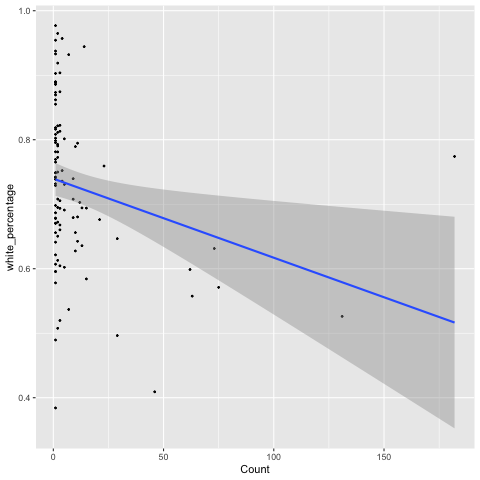

In [19]:
#Hypothesis: There are more private schools in counties that have a higher percentage of white population. 

%%R
library(ggplot2)
ggplot(texas_df, aes(x=Count, y=white_percentage)) + 
geom_point(size = 0.5)+
geom_smooth(method="lm")

`geom_smooth()` using formula = 'y ~ x'


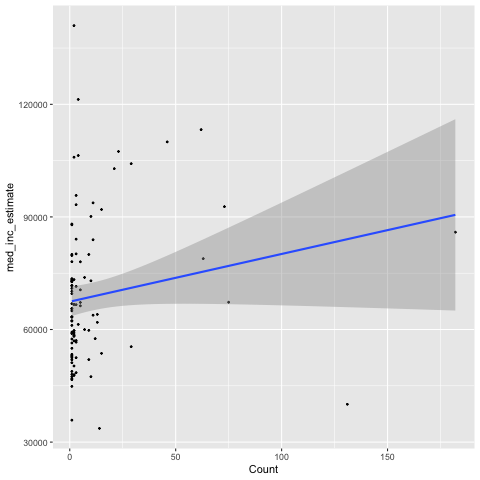

In [48]:
%%R
library(ggplot2)
ggplot(texas_df, aes(x=Count, y=med_inc_estimate)) + 
geom_point(size = 0.5)+
geom_smooth(method="lm")

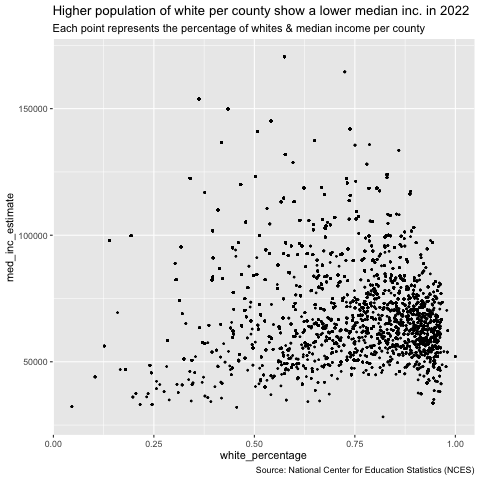

In [75]:
%%R
library(ggplot2)
ggplot(df, aes(x=white_percentage, y=med_inc_estimate)) + 
geom_point(size = 0.5)+
 labs(
    title = "Higher population of white per county show a lower median inc. in 2022",
    subtitle = "Each point represents the percentage of whites & median income per county",
    caption = "Source: National Center for Education Statistics (NCES)"
  )


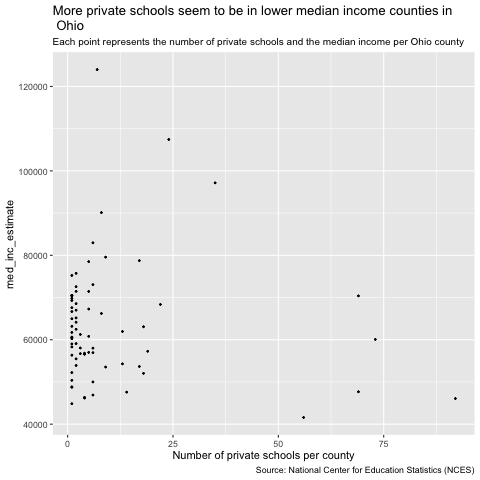

In [99]:
%%R
library(ggplot2)

ggplot(county_stats, aes(x=Count, y=med_inc_estimate)) + 
  geom_point(size = 0.5) +
  labs(
    title = "More private schools seem to be in lower median income counties in\n Ohio",
    x = "Number of private schools per county",
    subtitle = "Each point represents the number of private schools and the median income per Ohio county",
    caption = "Source: National Center for Education Statistics (NCES)"
  ) +
  theme(plot.subtitle = element_text(size = 10))  # Reduce subtitle font size



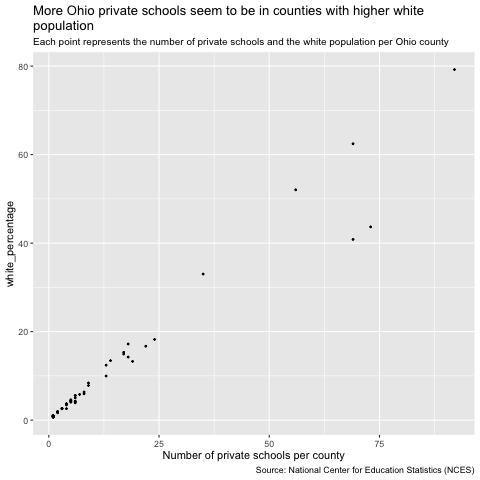

In [114]:
%%R
library(ggplot2)

ggplot(white_pop, aes(x=Count, y=white_percentage)) + 
  geom_point(size = 0.5) +
  labs(
    title = "More Ohio private schools seem to be in counties with higher white \npopulation",
    x = "Number of private schools per county",
    subtitle = "Each point represents the number of private schools and the white population per Ohio county",
    caption = "Source: National Center for Education Statistics (NCES)"
  ) +
  theme(plot.subtitle = element_text(size = 10))  # Reduce subtitle font size
